In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df_country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df_dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')

In [3]:
df_dictionary.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [4]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [26]:
X = df_country.iloc[:,2:]
X.columns

Index(['exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp'],
      dtype='object')

In [7]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [8]:
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 0, 3, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 3, 1, 2, 0, 2, 2, 2, 0, 0, 3, 0, 0, 2, 2, 1, 2, 2, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 3, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2])

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626])

In [28]:
kmeans_pca = cluster.KMeans(n_clusters=4)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=4)

In [29]:
kmeans_pca.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

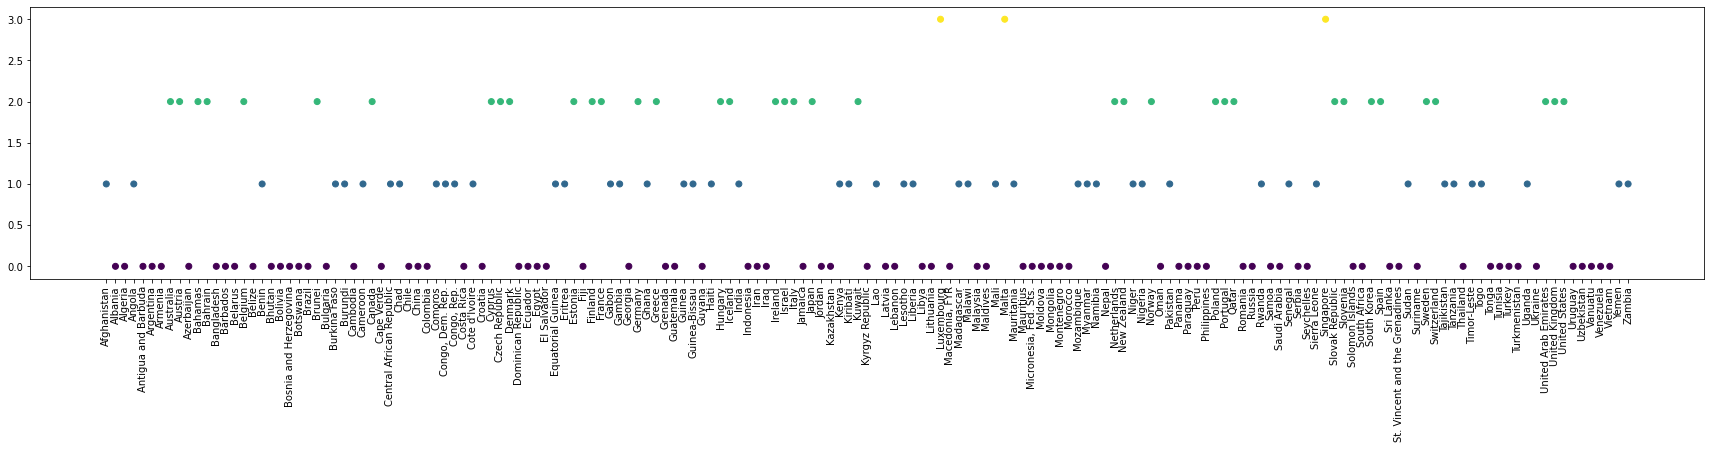

In [30]:
plt.figure(figsize=(30,5))
plt.scatter(df_country['country'], kmeans_pca.labels_, c=kmeans_pca.labels_)
plt.xticks(rotation=90)
plt.show()

In [31]:
label = ['under-developing country' if label==0 else 'developing country' if label==1 
         else 'developed country' for label in kmeans_pca.labels_]

In [32]:
output = pd.DataFrame({'country': df_country['country'], 'label': label})

In [33]:
output.to_csv('clusteringoutput.csv', index=False)

In [34]:
output['label'].value_counts()

under-developing country    80
developing country          47
developed country           40
Name: label, dtype: int64

In [35]:
print('Developed Countries')
output.loc[output['label'] == 'developed country', 'country']

Developed Countries


7                 Australia
8                   Austria
10                  Bahamas
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
51                  Estonia
53                  Finland
54                   France
58                  Germany
60                   Greece
67                  Hungary
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
121                  Poland
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                 

In [36]:
print('Developing Countries')
output.loc[output['label'] == 'developing country', 'country']

Developing Countries


0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107     

In [37]:
print('Under Developing Countries')
output.loc[output['label'] == 'under-developing country', 'country']

Under Developing Countries


1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 80, dtype: object

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [41]:
y= output['label']

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

C:\Users\danla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
lr.score(x_test,y_test)

0.8627450980392157